<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/Experiment_exploring_HFmrEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train the model on data of EF<40 SHF and EF>50. Then use the model to predict patients in the range of 41-49. The experiment can help us understand the nature of the patients with HFmrEF and shed light on the overlapping grey area. The EF can be validated with actual data and an explanatory hypothesis can be developed.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
plt.style.use("ggplot")
plt.style.use("seaborn")

df = pd.read_csv("/content/All_CHF_Dataframe.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df_lvef = df.copy()
df_lvef['LVEF'].clip(40,50,inplace = True)         #Classifying the LVEF in two categories
df_lvef['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
df_lvef['LVEF'].replace(to_replace=50,value=int(1),inplace=True)

In [30]:
df_lvef.LVEF.unique()

array([ 0.,  1., 42., 49., 46., 47., 45., 48., 44., 43., 41.])

In [5]:
mref_index = df_lvef.loc[df_lvef.LVEF >1].index 
#index of all the rows having EF other than 0 or 1 (40<EF<50)

In [6]:
hfmref = df_lvef[df_lvef.LVEF >1]
df_lvef = df_lvef.drop(index=mref_index)  #selecting the rows having EF other than 0 or 1

In [7]:
Y = df_lvef['LVEF'].to_numpy()
X = pd.DataFrame(df_lvef.drop(columns = ['LVEF','dementia','type.of.heart.failure','weight','height','congestive.heart.failure','peptic.ulcer.disease'])).to_numpy()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

In [9]:
# HFmrEF data 
x_hfmr = pd.DataFrame(hfmref.drop(columns = ['LVEF','dementia','type.of.heart.failure','weight','height','congestive.heart.failure','peptic.ulcer.disease'])).to_numpy()
y_hfmr = hfmref['LVEF'].to_numpy()
scaler = preprocessing.StandardScaler().fit(x_hfmr)
x_hfmr = scaler.transform(x_hfmr)

In [13]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 91.30
Accuracy Train 100.00
ROC-AUC Score 95.42
Recall Score 88.89


In [14]:
hfmr_pred = clf.predict(x_hfmr)

In [15]:
df_xtrain = pd.DataFrame(x_train)
df_xtest = pd.DataFrame(x_test)

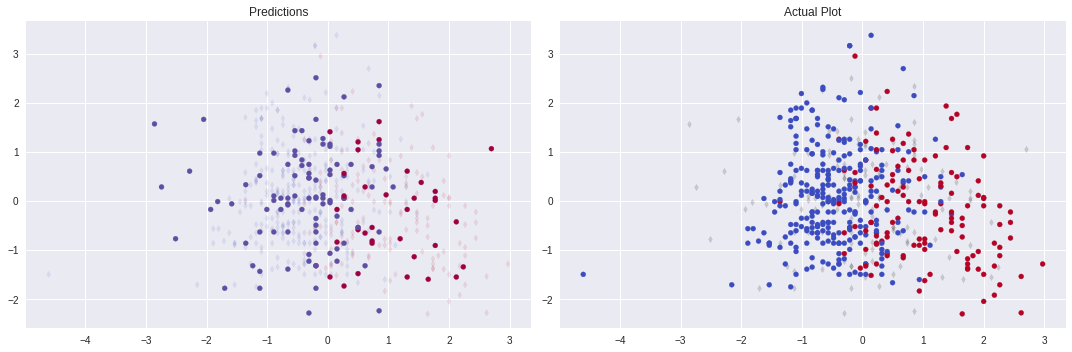

In [16]:
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(x_train[:,23],x_train[:,4],c=y_train,cmap='coolwarm_r',marker='d',s=20,alpha=.10)
axes[0].scatter(x_hfmr[:,23],x_hfmr[:,4],c=clf.predict(x_hfmr),cmap='Spectral',s=25)
axes[1].scatter(x_hfmr[:,23],x_hfmr[:,4],c='black',marker='d',s=20,alpha=0.15)
axes[1].scatter(x_train[:,23],x_train[:,4],c=y_train,cmap='coolwarm_r',s=25)
axes[0].title.set_text("Predictions")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()

(array([2.8030303, 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 7.1969697]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

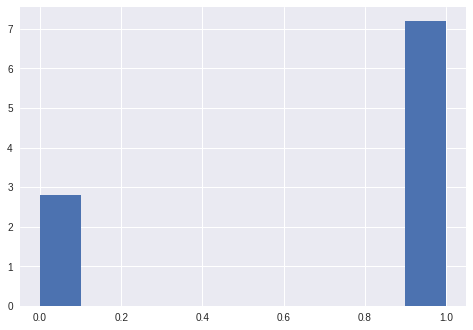

In [17]:
plt.hist(hfmr_pred,density=True)

In [41]:
hfmr_lvef_pred=[[],[]]
for yt,yp in zip(y_hfmr,hfmr_pred):
    if yp == 1:
        hfmr_lvef_pred[0].append(yt)
    else:
        hfmr_lvef_pred[1].append(yt)

In [3]:
n_weights = int(input())
weights = []
for i in range(n_weights):
    weights.append(int(input()))
weights.sort()
total_gain = 0
for i in range(0,n_weights,4):
    total_gain += weights[i+1]
print(total_gain)

8
1
3
4
1
5
1
5
3


TypeError: ignored